# Mall Customer Segmentation 

## Motivation 

Customer segmentation, also known as market basket analysis, is a very useful concept in marketing. By identifying unique customer traits, businesses understand their customers on a deeper level, allowing more strategic marketing and advertising to target different groups of customers.

Using K-means clustering, which is an unsupervised machine learning technique, we can group similar customers and identify several types of customer profile.

This dataset consists of hypothetical customer data in a shopping mall.

Data source: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

**Sections:**
1. Exploratory data analysis
2. Data preparation
3. Training model
4. Model evaluation

## Data Information 

This dataset has five features: 

**_1. CustomerID:_** Unique ID assigned to the customer  
**_2. Gender:_** Gender of the customer  
**_3. Age:_** Age of the customer  
**_4. Annual Income (k$):_** Annual income of the customer, in thousand dollars  
**_5. Spending Score (1-100):_** Score assigned by the mall based on customer behavior and spending nature, ranging from 0 to 100

In total, there are 200 customer records in this dataset.

## Import Libraries & Data

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
#observe samples of data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis

In [4]:
#observe data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There is no missing data.

In [6]:
#overview of feature statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Distribution

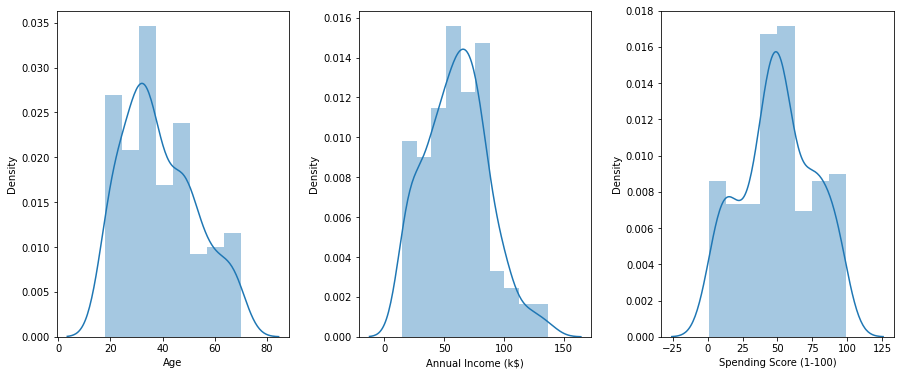

In [15]:
plt.figure(1 , figsize = (15 , 6))
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
pos = 1
for f in features:
    plt.subplot(1, 3, pos)
    plt.subplots_adjust(hspace = 0.2, wspace = 0.3)
    sns.distplot(df[f])
    pos += 1
plt.show()

By plotting histogram, the distribution of the features can be observed. 

### Gender

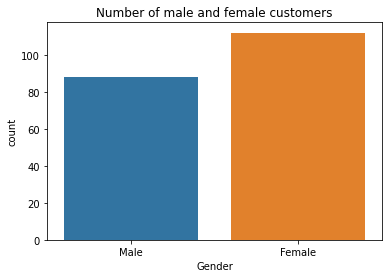

In [19]:
sns.countplot(x = "Gender", data = df)
plt.title("Number of male and female customers")
plt.show()

There are more female customers.

### Relationship between features

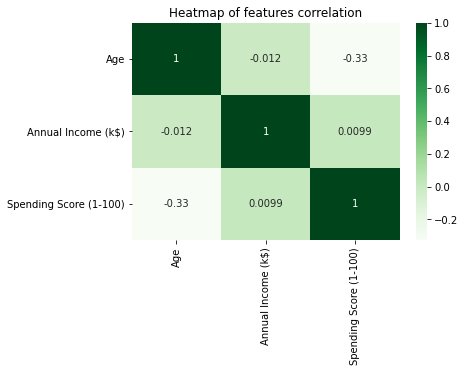

In [20]:
#correlation to identify relationship between features
sns.heatmap(df.iloc[:,1:].corr(), annot = True, cmap = plt.cm.Greens) #exclude customerID 
plt.title("Heatmap of features correlation")
plt.show()

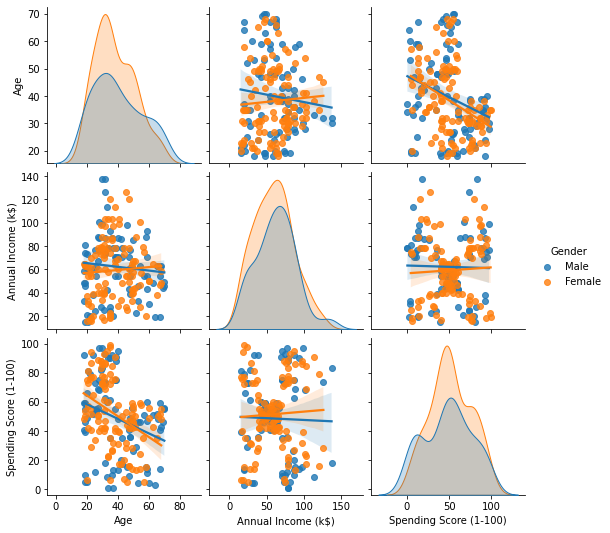

In [23]:
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue = 'Gender', kind = 'reg')
plt.show()

Plotting a heatmap of the correlation between the features shows that there are very weak associations. However, from the pairplot, we observe that there are stronger associations between the features when separating them by gender.

For example, there is moderate negative correlation between age and spending score. 

We also observe that the female customers are older, have higher annual income and spending score.

### Age and annual income

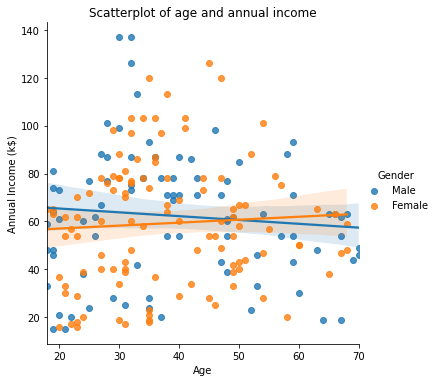

In [26]:
sns.lmplot(x = 'Age', y = 'Annual Income (k$)', data = df, hue = "Gender")
plt.title('Scatterplot of age and annual income')
plt.show()

Customers between age 30 - 60 have higher annual income in general.

### Age and spending score

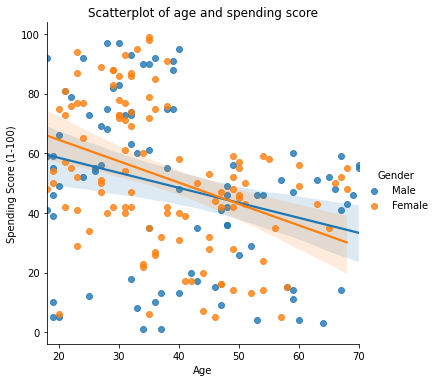

In [27]:
sns.lmplot(x = 'Age', y = 'Spending Score (1-100)', data = df, hue = "Gender")
plt.title('Scatterplot of age and spending score')
plt.show()

We can see that young people have high spending score, while customers who are 30 years old or above have low or moderate spending score.

### Annual income and spending score

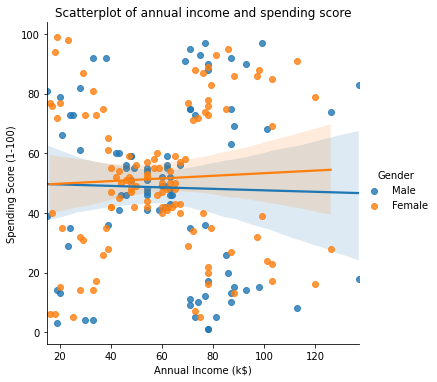

In [28]:
sns.lmplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, hue = "Gender")
plt.title('Scatterplot of annual income and spending score')
plt.show()

We can observe 5 groups of customers here:
1. Customers with low annual income and low spending score, these customers are likely to spend within their means.
2. Customers with low annual income and high spending score, these customers enjoy spending on goods and enjoyment.
3. Customers with moderate annual income and moderate spending score, promotion might be useful in getting them to spend more.
4. Customers with high annual income and low spending score, this group of customers are also very valuable as they have the spending power to pay for products.
5. Customers with high annual income and high spending score, it might be useful to have a loyalty programme to ensure these customers are retained in the long term.

## Determining number of clusters (k value) 

We will group customers using 3 features: Annual income, spending score and age.

To determine the appropriate number of clusters, we will be using the elbow method.

In [29]:
#features for training
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [32]:
#Calculate the Within-Cluster Sum of Square (WCSS)
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

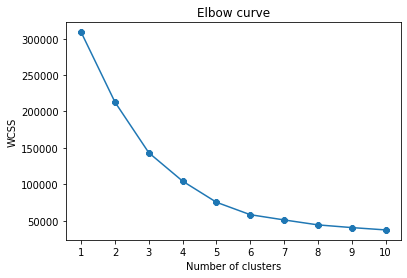

In [33]:
#plot elbow curve
plt.plot(range(1, 11), wcss, marker ="8")
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11,1)) #to set x axis grid
plt.ylabel('WCSS') 
plt.title('Elbow curve')
plt.show()

Based on the graph, WCSS decreases sharply and the elbow shape is created at k = 5. The optimal number of clusters for the model is 5.

## Train model 

In [34]:
#define model with 5 clusters
km = KMeans(n_clusters = 5, init = "k-means++", random_state = 5)
#fit input data to train model, and predict labels
y = km.fit_predict(X)
#add labels to dataframe
df['Label'] = y

In [35]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2


In [39]:
#Create a 3d plot to view the clusters determined by the mode
trace1 = go.Scatter3d(
    x= df['Spending Score (1-100)'],
    y= df['Annual Income (k$)'],
    z= df['Age'],
    mode='markers',
     marker=dict(
        color = df['Label'], 
        size= 5,
        line=dict(
            color= df['Label'],
        ),
        opacity = 0.9
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Spending Score (1-100)'),
            yaxis = dict(title  = 'Annual Income (k$)'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)

## Conclusion 

**1. Blue cluster**
- Customers with moderate to high income but don't spend much in the mall, they are mostly in their thirties to fifties.
- This is a group with high potential and the mall should try to run campaigns that will encourage these customers to spend as they have the purchasing power.
- They can be targeted for luxury goods advertisement and marketing efforts.

**2. Orange cluster** 
- Customers in their twenties or thirties with high spending score and high annual income.
- The mall can focus its efforts on maintaining strong relationship with this group of customers through loyalty programme, which encourages customer retention in the long run.

**3. Yellow cluster**
- Customers with moderate spending score and annual income, they come from all age groups.
- This group of customers are likely from the middle group, who are willing to spend for necessities and sometimes luxury goods.

**4. Purple cluster**
- Young people who spend a lot but don't earn much.
- Marketing efforts should target young people, and interesting products that could be affordable.

**5. Pink cluster** 
- Customers with low income and also don't spend much in the mall.

References:
- https://www.analyticsvidhya.com/blog/2021/05/k-means-clustering-with-mall-customer-segmentation-data-full-detailed-code-and-explanation/
- https://datauab.github.io/mall_segmentation/
- https://www.natasshaselvaraj.com/customer-segmentation-with-python/